In [6]:
%matplotlib inline
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind, ttest_1samp
import pandas as pd
from importlib import reload
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns


import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf
import TreeMazeAnalyses2.Utils.robust_stats as rs

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

from joblib import delayed, Parallel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
ei = reload(ei)
info = ei.SummaryInfo()

In [52]:
%%time
overwrite=False

zrc_exps = [2,5]
def _get_task_from_session(session):
    return session.split("_")[1]

zrc = []
for zrc_exp in zrc_exps:
    if zrc_exp == 0:
        params = dict()
        zrc_str = ''
    elif zrc_exp==1:
        params=dict(trial_end='tE_1')
        zrc_str = 'tE_1'
    elif zrc_exp==2:
        params=dict(trial_end='tE_2')
        zrc_str = 'tE_2'
    elif zrc_exp==3:
        params=dict(reward_blank=True)
        zrc_str = 'rwb'
    elif zrc_exp==4:
        params=dict(trial_end='tD')
        zrc_str = 'tD'
    elif zrc_exp==5:
        params=dict(corr_method='pearson')
        zrc_str = 'pearson'
        
    temp =  info.get_zone_rates_remap(overwrite=overwrite, **params)
    temp['task'] = temp.session.apply(_get_task_from_session)
    zrc.append(temp)

error getting the trial sets CR_bo
Error Processing Session Cl_T3g_120118
Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 400, in get_zone_rates_remap
    session_zone_rate_comp_table = session_info.get_zone_rates_remap(overwrite=False,
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 2826, in get_zone_rates_remap
    df = trial_analyses.all_zone_remapping_analyses(corr_method=params['corr_method'],
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2920, in all_zone_remapping_analyses
    bcorrs = _inner_loop(parallel)
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2907, in _inner_loop
    bcorrs[cond_pair] = self.zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=cond_pair,
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2797, in zone_r

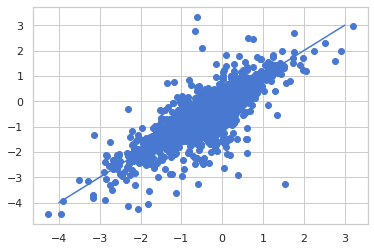

In [54]:
z_var = 'CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm'
#z_var = 'CR_bo-CL_bo-corr_m'
plt.scatter(zrc[0][z_var], zrc[1][z_var])
plt.plot([-4,3],[-4,3])

In [58]:
zrc[0].corrwith(zrc[1])#[corr_measures]-zrc[1][corr_measures]

unit_id                                  1.000000
session_pct_cov                               NaN
session_valid                                 NaN
session_unit_id                          1.000000
CR-CL_corr                               0.905557
CR-CL_t_m                                0.994270
CR-CL_t_var                              0.991141
Even-Odd_corr                            0.909159
Even-Odd_t_m                             0.958994
Even-Odd_t_var                           0.077923
Co-Inco_corr                             0.911107
Co-Inco_t_m                              0.992715
Co-Inco_t_var                            0.990729
Out-In_corr                              0.890608
Out-In_t_m                               0.999732
Out-In_t_var                             0.999544
Left_corr                                0.903082
Left_t_m                                 0.996871
Left_t_var                               0.999188
Right_corr                               0.907667


In [62]:
(zrc[0].describe()-zrc[1].describe())[corr_measures]

,CR-CL_corr,Even-Odd_corr,Co-Inco_corr,Out-In_corr,Left_corr,Right_corr,CoSw-IncoSw_corr,CR_bo-CL_bo-corr_m,CR_bo-CL_bo-corr_z,Co_bo-Inco_bo-corr_m,...,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_ztp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_ztp
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
mean,-0.168981,-0.175872,-0.171132,-0.053951,-0.156002,-0.159986,-0.145715,-0.157245,-0.057090,-0.155645,...,0.689226,1.047933e-02,0.090404,-2.955344e-05,0.685715,1.083786e-02,0.083086,-3.869883e-04,0.283161,3.075141e-03
std,-0.071157,-0.057754,-0.069301,-0.096889,-0.075688,-0.073896,-0.083205,-0.076995,-0.099908,-0.077464,...,-1.016395,1.030891e-02,-0.132565,2.640333e-06,-0.983508,1.643761e-02,-0.134043,-9.456590e-04,-0.792686,2.585223e-03
min,0.101268,0.016352,0.112178,0.138901,0.148858,0.127242,0.069223,0.137363,-0.019914,0.097984,...,6.429179,8.136803e-78,-0.598878,0.000000e+00,3.430165,8.328307e-73,1.105984,0.000000e+00,8.934025,5.307778e-71
25%,-0.132414,-0.178312,-0.139024,0.036760,-0.125535,-0.121047,-0.079925,-0.092788,0.032714,-0.093645,...,1.327119,3.493202e-16,0.190456,4.724342e-59,1.153544,1.650164e-17,0.123770,2.618605e-76,0.308443,4.864485e-24
50%,-0.219406,-0.240374,-0.220212,-0.054180,-0.215793,-0.224081,-0.174447,-0.184635,-0.009194,-0.179408,...,0.496819,3.420690e-07,0.072181,5.435127e-34,0.589230,1.956002e-07,0.055657,1.483637e-40,0.367050,4.500872e-11
75%,-0.233222,-0.225403,-0.236126,-0.121863,-0.232870,-0.233848,-0.238894,-0.240816,-0.087351,-0.244184,...,0.101467,1.321014e-02,-0.006135,1.324501e-19,-0.072159,6.511492e-03,-0.006704,3.933486e-23,-0.020339,6.125618e-04
max,-0.080519,-0.062942,-0.078068,-0.199971,-0.070302,-0.065024,-0.123710,-0.107285,-0.197491,-0.115777,...,-3.826249,-2.790248e-03,-0.769839,0.000000e+00,-5.807781,6.495550e-03,-0.074408,0.000000e+00,-1.048041,6.841004e-03


In [13]:
subject_widget = widgets.Dropdown(options=info.subjects)
session_widget = widgets.Dropdown(options=info.sessions_by_subject[subject_widget.value])
task_widget = widgets.Dropdown(options=['T3', 'OF'])
""
def update_sessions(*args):
    all_sessions = info.sessions_by_subject[subject_widget.value]
    task_sessions = [session for session in all_sessions if task_widget.value in session]
    session_widget.options = task_sessions

def get_session(subject, task, session):
    return ei.SubjectSessionInfo(subject, session)

subject_widget.observe(update_sessions, names='value')
task_widget.observe(update_sessions, names='value')
o=widgets.interactive(get_session, subject=subject_widget, task=task_widget, session=session_widget)
display(o)

interactive(children=(Dropdown(description='subject', options=('Li', 'Ne', 'Cl', 'Al', 'Ca', 'Mi'), value='Li'…

In [42]:
session = session_widget.value
session_info = o.result
print(session_info)


Session Information for subject Ne, session NE_T3g_061218
Number of curated units: 14
Methods listed below can be executed with get_{method}(), eg. get_spikes():
  -> track_data. Executed = True
  -> spikes. Executed = True
  -> binned_spikes. Executed = True
  -> fr. Executed = True
  -> pos_zones. Executed = True
  -> event_table. Executed = True
  -> trial_zone_rates. Executed = False
  -> zone_rates_comps. Executed = True
  -> zone_rates_remap. Executed = True
  -> pop_zone_rates_remap. Executed = True
  -> bal_conds_seg_rates. Executed = True
  -> bal_conds_seg_boot_rates. Executed = nan
  -> zone_encoder. Executed = True
  -> zone_decoder. Executed = True

To run all analyses use run_analyses().



In [40]:
r1 = session_info.get_zone_rates_remap()

In [41]:
r1[z_var]

0    -1.294839
1    -3.241607
2    -0.318618
3    -0.341375
4     0.422427
5    -1.491158
6    -0.435803
7    -1.291941
8    -1.654557
9     0.115094
10    0.315392
11   -0.441955
12   -0.583545
13   -1.564769
14    0.178324
15   -1.306168
16   -1.321999
17   -1.411239
18   -1.349306
19   -1.563319
20   -1.962065
21   -0.442950
22   -0.573278
23   -1.164492
24    0.421323
Name: CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm, dtype: float64

In [42]:
r2=session_info.get_zone_rates_remap(**{'corr_method':'pearson'})

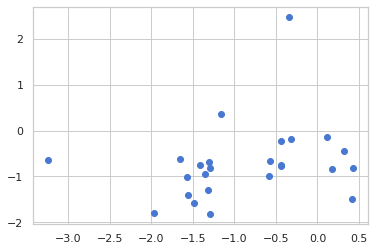

In [43]:
plt.scatter(r1[z_var], r2[z_var])

### check method for correct parameters


In [43]:
ei = reload(ei)
info = ei.SummaryInfo()
session_info = ei.SubjectSessionInfo(subject_widget.value, session_widget.value)

In [44]:
%%time
which = 'zone_rates_remap'
overwrite = False
params_1 = {'corr_method':'pearson'}
session_info.run_analyses(which=which, overwrite=overwrite, **params_1)

CPU times: user 5.02 ms, sys: 42 µs, total: 5.06 ms
Wall time: 3.85 ms


In [45]:
%%time
which = 'zone_rates_remap'
overwrite = False
params_2 = {'corr_method':'kendall'}
session_info.run_analyses(which=which, overwrite=overwrite, **params_2)

CPU times: user 1.13 ms, sys: 3.94 ms, total: 5.07 ms
Wall time: 3.66 ms


In [46]:
%%time
r1=session_info.get_zone_rates_remap(**params_1)
r2=session_info.get_zone_rates_remap(**params_2)

CPU times: user 18.4 ms, sys: 0 ns, total: 18.4 ms
Wall time: 15 ms


<AxesSubplot:>

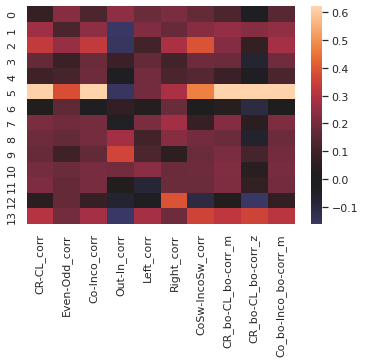

In [47]:
corr_measures = [c for c in zrc[0].columns if 'corr' in c]
sns.heatmap((r1-r2)[corr_measures[:10]], robust=True, center=0)

In [48]:
r1.corrwith(r2)

CR-CL_corr                               0.687972
CR-CL_t_m                                0.999250
CR-CL_t_var                              0.998782
Even-Odd_corr                            0.903565
Even-Odd_t_m                             0.994657
Even-Odd_t_var                           0.995774
Co-Inco_corr                             0.734895
Co-Inco_t_m                              1.000000
Co-Inco_t_var                            1.000000
Out-In_corr                              0.823551
Out-In_t_m                               0.999960
Out-In_t_var                             0.999948
Left_corr                                0.949824
Left_t_m                                 1.000000
Left_t_var                               1.000000
Right_corr                               0.930515
Right_t_m                                1.000000
Right_t_var                              1.000000
CoSw-IncoSw_corr                         0.854518
CoSw-IncoSw_t_m                          1.000000


In [49]:
remap_measures = zrc[0].columns[10:]
# test_vars = [metric for metric in remap_measures if (('corr' in metric) & (len(metric.split('-'))<=3))]

@interact
def plot_correlation_relationships(var=remap_measures):
    print(f"Column idx = {np.where(remap_measures==var)[0][0]}")
    plt.scatter(r1[var], r2[var])
    plt.xlabel('pearson')
    plt.ylabel('kendall')

interactive(children=(Dropdown(description='var', options=('CR-CL_corr', 'CR-CL_t_m', 'CR-CL_t_var', 'Even-Odd…

In [129]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

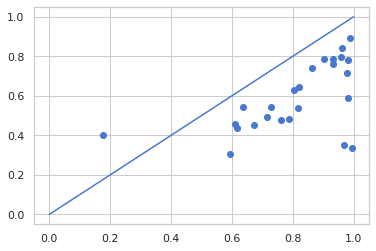

In [137]:
r1 = ta.zone_rate_maps_corr(cond1='CR', cond2='CL', corr_method='pearson')
r2 = ta.zone_rate_maps_corr(cond1='CR', cond2='CL', )
plt.scatter(r1,r2)
plt.plot([0,1],[0,1])

In [ ]:
%%time
params = {"corr_method": "pearson"}
overwrite=True
info.run_analyses(which='zone_rates_remap', task='T3', verbose=False, overwrite=overwrite, **params)

Error on parallel step.
Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/parallel.py", line 935, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/_parallel_backends.py", line 542, in wrap_future_result
    return future.result(timeout=timeout)
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/concurrent/futures/_base.py", line 440, in result
    self._condition.wait(timeout)
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/threading.py", line 312, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2812, in zone_rate_maps_bal_conds_boot_corr
    corr = parallel(delayed(_worker)(bo

Exception ignored in: <function BaseGeometry.__del__ at 0x7f82bf3a78b0>
Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/shapely/geometry/base.py", line 241, in __del__
    def __del__(self):
KeyboardInterrupt: 


Keyboard Interrupt
..Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.Keyboard Interrupt
.

Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 575, in run
    self.flag_executor_shutting_down()
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 770, in flag_executor_shutting_down
    self.kill_workers(reason="executor shutting down")
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 781, in kill_workers
    recursive_terminate(p)
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/externals/loky/backend/utils.py", line 28, in recursive_terminate
    _recursive_terminate_without_psutil(process)
  File 

Error on parallel step.
Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/parallel.py", line 935, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/_parallel_backends.py", line 542, in wrap_future_result
    return future.result(timeout=timeout)
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/concurrent/futures/_base.py", line 440, in result
    self._condition.wait(timeout)
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/threading.py", line 312, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/tree_maze_functions.py", line 2812, in zone_rate_maps_bal_conds_boot_corr
    corr = parallel(delayed(_worker)(bo

In [1]:
2

2